<a href="https://colab.research.google.com/github/vanshikaml04/DEEP-LEARNING/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Digit Classification
We have 70,000 images of handwritten digits.
Each image is 28x28 pixels (small and low quality).
Our goal is to predict which digit (0–9) the image shows.
💪One hidden layer with 128 neurons.
💪Output layer with 10 neurons (for digits 0–9).
🥲This is a multi-class classification problem.

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [47]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train.shape
#3d array

(60000, 28, 28)

In [49]:
X_train[0].shape
#28x28 pixel image

(28, 28)

In [50]:
Y_train.shape
#1d array

(60000,)

In [51]:
Y_train
# contains the value of digits
print(Y_train[:10])
#the output layer of your model has 10 neurons → one for each digit.

[5 0 4 1 9 2 1 3 1 4]


In [52]:
#convert pixel image to actual value
import matplotlib.pyplot as plt

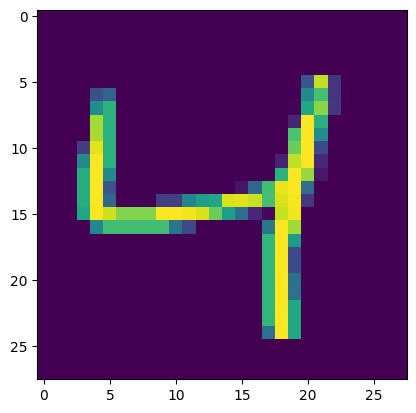

In [53]:
plt.imshow(X_train[2])

In [54]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [55]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

MNIST images have pixel values from 0 to 255.

Neural networks work better when inputs are in a smaller range, usually 0 to 1.

X_train = X_train / 255 divides every pixel by 255, so now pixel values are in [0, 1].

In [56]:
X_train = X_train/255
X_test = X_test/255

In [57]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

TRAINING 🤧🥲💪

In [58]:
model = Sequential()
#Sequential is used when are NN is a simple stack of layers one after another.
# this helps in adding new layers one by one

In [59]:
model.add(Flatten(input_shape=(28,28)))
#converts a multidimensional array to 1d array
#Original image shape: (28, 28)  →  Flatten → (784,)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.add(Dense(128,activation='relu')) # 784*128+128=100480
model.add(Dense(10,activation='softmax')) # 128*10+10=1290

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [79]:
 model.fit(X_train,Y_train,epochs=23,validation_split=0.2)

Epoch 1/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0065 - val_loss: 0.1320
Epoch 2/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0041 - val_loss: 0.1280
Epoch 3/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0032 - val_loss: 0.1460
Epoch 4/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0051 - val_loss: 0.1309
Epoch 5/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 9.8157e-04 - val_loss: 0.1870
Epoch 6/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0075 - val_loss: 0.1567
Epoch 7/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0024 - val_loss: 0.1449
Epoch 8/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0029 - val_loss: 0.1596
Epoch 9/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0076 - val_loss: 0.1436
Epoch 10/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0045 - val_loss: 0.1496
Epoch 11/23
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0026 - val_loss: 0.1368
Epoch 12/23
1500/1500 ━━

In [86]:
y_prob = model.predict(X_test)

# model is wha we used to trained and X_test ia are testing data
# model.predict(X_test) --> will store the value of the output of the testing data
# this value (predicted outputs)is stored in y_prod
# the output shows the amount of data it had to process and the time taken to process it

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [87]:
y_prob

array([[1.0856205e-18, 3.6987672e-28, 4.7749311e-18, ..., 9.9999994e-01,
        1.1244630e-15, 2.1005546e-10],
       [1.4843112e-30, 4.2357201e-16, 9.9999994e-01, ..., 7.6888903e-36,
        6.7921553e-21, 1.4305491e-31],
       [1.2315642e-13, 9.9999779e-01, 5.0565558e-07, ..., 3.3077130e-10,
        1.6289483e-06, 1.5300060e-15],
       ...,
       [2.1433934e-37, 9.7804404e-29, 5.4253442e-31, ..., 2.5563228e-19,
        6.3313441e-22, 8.1374940e-13],
       [4.4202658e-27, 7.3697778e-36, 5.7384126e-34, ..., 3.9082698e-29,
        3.9010844e-17, 2.5193374e-30],
       [2.6759642e-23, 0.0000000e+00, 9.6220525e-29, ..., 0.0000000e+00,
        1.5166682e-36, 0.0000000e+00]], dtype=float32)

In [94]:
y_pred = y_prob.argmax(axis=1)
# y_pred ---> will store the highest predicted value from each row of all the classes of y_prob
# the highest value of the y_pred indicates the number the X_test data mathces the max with
# basically return the predicted labels after training the data

In [95]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

ACCURACY 97.9% 😁😎😉

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(Y_test,y_pred)
# it calulates == no. of correct predictions / total observations
# y_test -->  10000
# y_pred -->  10000
# total correct out of predicted --> will be the no. of correct prediction that will be divided by y_test.shape(total observations)

0.979

In [97]:
Y_test.shape

(10000,)

In [98]:
y_pred.shape

(10000,)

TESTING 😵‍💫😣🤐

In [102]:
# A look at some predictions
for i in range(10):
  print(f'Sample {i} -- PREDICTED -- {y_pred[i]} -- ACTUAL --{Y_test[i]}')

Sample 0 -- PREDICTED -- 7 -- ACTUAL --7
Sample 1 -- PREDICTED -- 2 -- ACTUAL --2
Sample 2 -- PREDICTED -- 1 -- ACTUAL --1
Sample 3 -- PREDICTED -- 0 -- ACTUAL --0
Sample 4 -- PREDICTED -- 4 -- ACTUAL --4
Sample 5 -- PREDICTED -- 1 -- ACTUAL --1
Sample 6 -- PREDICTED -- 4 -- ACTUAL --4
Sample 7 -- PREDICTED -- 9 -- ACTUAL --9
Sample 8 -- PREDICTED -- 6 -- ACTUAL --5
Sample 9 -- PREDICTED -- 9 -- ACTUAL --9
